In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%timeit
df = pd.read_csv('features_matrix.csv', index_col='NUM_PERS')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123460 entries, 15954 to 90630105
Columns: 357 entries, mt_M1 to sum_mt_impayes_obs
dtypes: float64(206), int64(149), object(2)
memory usage: 337.2+ MB


In [4]:
df.columns

Index(['mt_M1', 'mt_M2', 'mt_M3', 'sum_bad_debt', 'target_bad',
       'AVG_PRELEV_12M', 'AVG_RETR_CHQ_12M', 'AVG_RETR_GAB_12M',
       'AVG_ENC_CHQ_12M', 'AVG_PAY_CARTE_LOC_12M',
       ...
       'cmc_3_6', 'nbjdebut_3_6', 'solde_fdp_3_6', 'solde_moy_3_6', 'cmc_6_12',
       'nbjdebut_6_12', 'solde_fdp_6_12', 'solde_moy_6_12',
       'sum_nb_impayes_obs', 'sum_mt_impayes_obs'],
      dtype='object', length=357)

In [5]:
features = list(df.columns)

numeric_features = []
categorical_features = []

for dtype, feature in zip(df.dtypes[2:], df.columns[2:]):
    if dtype == object:
        #print(column)
        #print(train_data[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
categorical_features

['last_trx_type', 'grp_oper_MODE']

In [7]:
keys = list(df.columns)
values = list(df.dtypes)
dictionary = dict(zip(keys, values))

In [ ]:
# clean perimetre :
clean_df = df[df.sum_mt_impayes_obs]

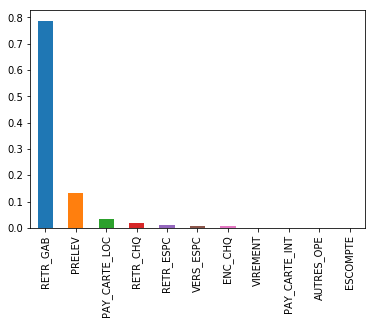

In [11]:
df.grp_oper_MODE.value_counts(normalize=True).plot(kind='bar')

In [24]:
avg_impaye_by_nb = df.groupby('sum_nb_impayes_obs',  as_index=False)['sum_mt_impayes_obs'].agg(['mean','size'])

In [33]:
clean_df = df[df['sum_mt_impayes_obs']<= 2000]

In [34]:
# drop leak colums
clean_df.drop(axis=1, columns=['mt_M1', 'mt_M2', 'mt_M3', 'sum_bad_debt', 'sum_nb_impayes_obs', 'sum_mt_impayes_obs'], inplace=True)

/home/user/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
for col in clean_df.columns:
    print("{}: {}".format(col, len(clean_df[col].unique())))

target_bad: 2
AVG_PRELEV_12M: 72988
AVG_RETR_CHQ_12M: 11519
AVG_RETR_GAB_12M: 43651
AVG_ENC_CHQ_12M: 21258
AVG_PAY_CARTE_LOC_12M: 42910
AVG_VERS_ESPC_12M: 13441
AVG_VIREMENT_12M: 6435
AVG_AUTRES_OPE_12M: 7304
AVG_CHANGE_12M: 1254
AVG_RETR_ESPC_12M: 7050
AVG_ESCOMPTE_12M: 1840
AVG_PAY_CARTE_INT_12M: 4033
AVG_PRELEV_1M: 41640
AVG_RETR_CHQ_1M: 1727
AVG_RETR_GAB_1M: 3973
AVG_PAY_CARTE_LOC_1M: 19638
AVG_ENC_CHQ_1M: 6184
AVG_VIREMENT_1M: 1197
AVG_ESCOMPTE_1M: 463
AVG_VERS_ESPC_1M: 2480
AVG_AUTRES_OPE_1M: 1390
AVG_RETR_ESPC_1M: 1047
AVG_PAY_CARTE_INT_1M: 1350
AVG_CHANGE_1M: 129
AVG_PRELEV_2M: 46101
AVG_RETR_CHQ_2M: 2966
AVG_RETR_GAB_2M: 8403
AVG_PAY_CARTE_LOC_2M: 26051
AVG_VERS_ESPC_2M: 3884
AVG_ENC_CHQ_2M: 8867
AVG_VIREMENT_2M: 1811
AVG_ESCOMPTE_2M: 739
AVG_RETR_ESPC_2M: 1760
AVG_AUTRES_OPE_2M: 2220
AVG_PAY_CARTE_INT_2M: 1988
AVG_CHANGE_2M: 239
AVG_PRELEV_3M: 48815
AVG_RETR_CHQ_3M: 4031
AVG_RETR_GAB_3M: 12182
AVG_ENC_CHQ_3M: 10872
AVG_PAY_CARTE_LOC_3M: 29433
AVG_VERS_ESPC_3M: 5000
AVG_AUTRES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc1fb31e80>,
      dtype=object)

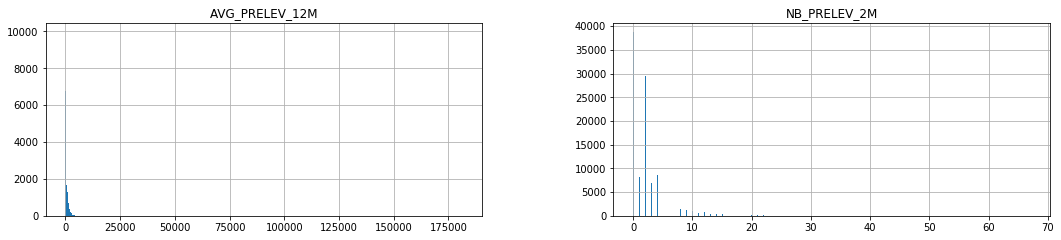

In [38]:
clean_df[['AVG_PRELEV_12M', 'NB_PRELEV_2M']].hist(bins='auto', figsize=(18, 22), layout=(5, 2))

In [40]:
(clean_df["target_bad"] == 1).sum() / (clean_df["target_bad"] == 0).sum()

0.03718450786036838

In [41]:
clean_df['target_bad'].mean()

0.035851391510925236